# Senator Stocks

senator name: Patrick J Toomey

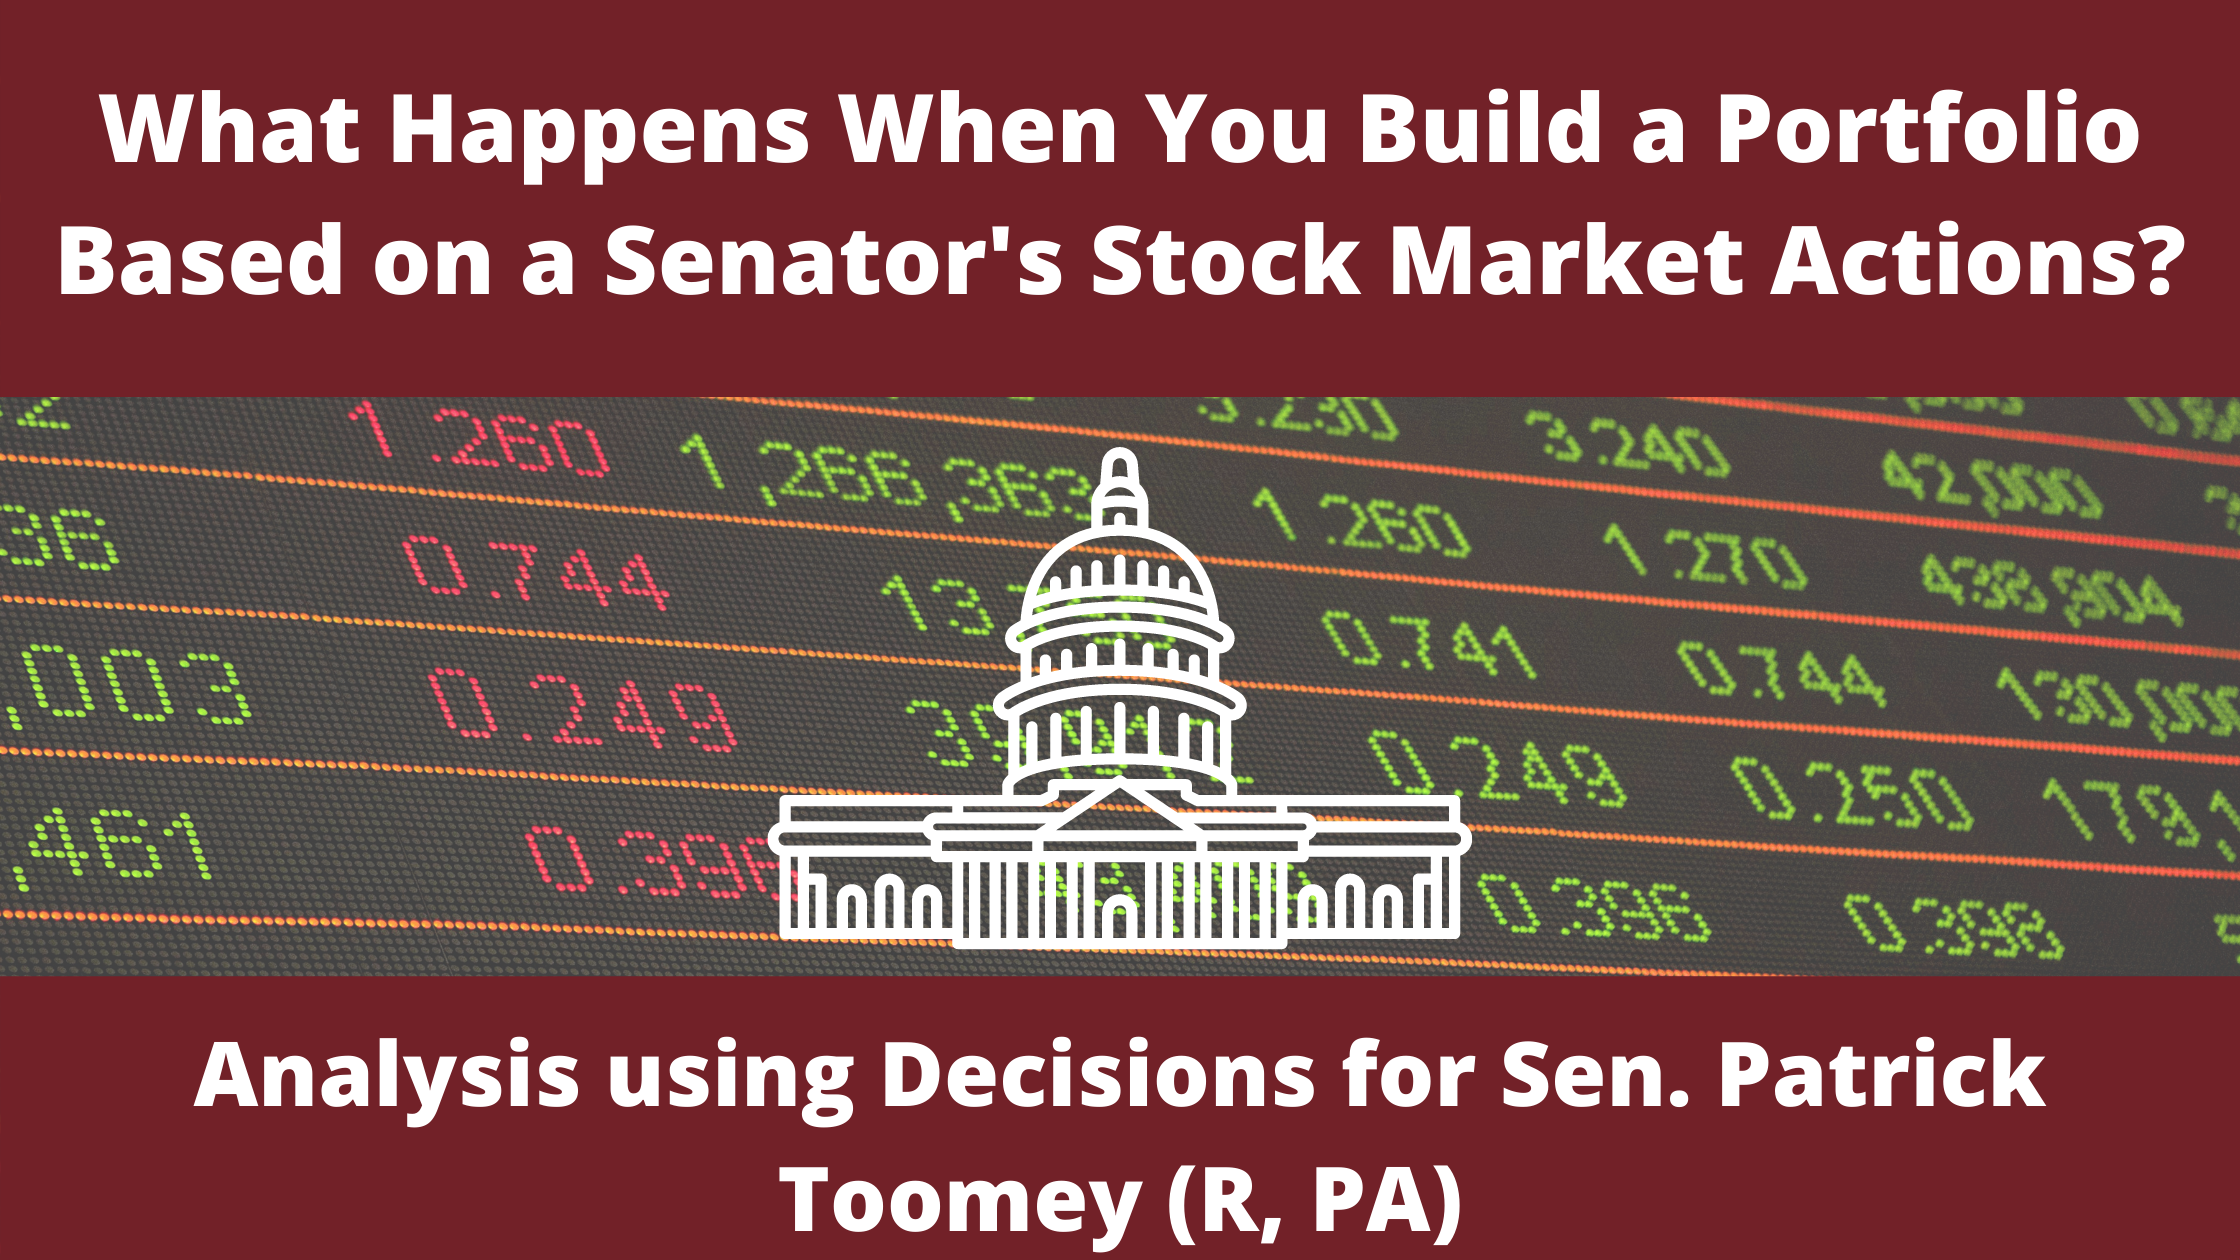

# 1. Check out the Data

First, we need to inspect our data. Before that, however, we need to mount our drive properly and import the data in the first place. We also need to import several Python packages for use later in the project.

For this analysis we are using the following:

* Pandas - for dataframes
* Seaborn - for plotting and tabular data
* Numpy - for arrays
* Matplotlib - for plotting
* RE - for 'regular expressions' in code
* Warnings - to control and filter Python warnings

In [ ]:
# import some packages
import pandas as pd # for dataframes
import seaborn as sns # for tabular data and plotting
import numpy as np # for arrays
import matplotlib.pyplot as plt # for plotting
import matplotlib as mpl # for plotting 
from pylab import *
import re
import warnings

# don't show me the annoying warning
warnings.filterwarnings('ignore')

# mount google drive & import data
from google.colab import drive
drive.mount('/content/drive')

# Fixed command for accessing Drive link and retrieving data
fixed_path = 'https://drive.google.com/uc?export=download&id='

Mounted at /content/drive


## 1.1 Retrieve Senator Data

Data sourced from the Senate Stock Watcher website for Sen. Pat Toomey at https://senatestockwatcher.com/summary_by_senator/Patrick%20J%20Toomey

* Downloaded data from website and converted to CSV format to simplify loading into Python. 
* Converted to DataFrame `df` and checked for basic functionality.

In [ ]:
# Save data link code as variable
URL_Senate_Data = 'https://drive.google.com/file/d/1r21wD40DaY8lsN5XR3wpNy8LUGVzZcok/view?usp=sharing'
# Extract the file ID from the URL (this part of the command is fixed)
file_path_Senate_Data = URL_Senate_Data.split('/')[-2]
# Retrieve the CSV data and build a dataframe
df = pd.read_csv(fixed_path + file_path_Senate_Data)
df.head()

,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link,disclosure_date
0,09/30/2021,Joint,PG,Procter &amp; Gamble Company (The) Common Stock,Stock,Purchase,"$1,001 - $15,000",--,Thomas H Tuberville,https://efdsearch.senate.gov/search/view/ptr/a...,10/15/2021
1,09/30/2021,Joint,NFLX,"Netflix, Inc. - Common Stock",Stock,Purchase,"$1,001 - $15,000",--,Thomas H Tuberville,https://efdsearch.senate.gov/search/view/ptr/a...,10/15/2021
2,09/30/2021,Joint,MPWR,"Monolithic Power Systems, Inc. - Common Stock",Stock,Purchase,"$1,001 - $15,000",--,Thomas H Tuberville,https://efdsearch.senate.gov/search/view/ptr/a...,10/15/2021
3,09/30/2021,Joint,KEYS,Keysight Technologies Inc. Common Stock,Stock,Purchase,"$1,001 - $15,000",--,Thomas H Tuberville,https://efdsearch.senate.gov/search/view/ptr/a...,10/15/2021
4,09/30/2021,Joint,KLAC,KLA Corporation - Common Stock,Stock,Purchase,"$1,001 - $15,000",--,Thomas H Tuberville,https://efdsearch.senate.gov/search/view/ptr/a...,10/15/2021


## Deeper data exploration (pre-cleaning)

This process sought to gain a deeper understanding of the dataset. We wanted to gain insights to:

* The size of the dataset
* The column names and purpose
* the types of data in each row
* obvious data limitations and issues to anticipate

In [ ]:
#check initial dataset information, such as info, columns and shape
print(df.info())
print(df.info())
print('-'*30)
print(df.columns)
print('-'*30)
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8879 entries, 0 to 8878
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   transaction_date   8879 non-null   object
 1   owner              8414 non-null   object
 2   ticker             8414 non-null   object
 3   asset_description  8879 non-null   object
 4   asset_type         8213 non-null   object
 5   type               8414 non-null   object
 6   amount             8879 non-null   object
 7   comment            8414 non-null   object
 8   senator            8879 non-null   object
 9   ptr_link           8879 non-null   object
 10  disclosure_date    8879 non-null   object
dtypes: object(11)
memory usage: 763.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8879 entries, 0 to 8878
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   transaction_date   8879 non-

## 1.2 Data cleaning

Key data cleaning objectives accomplished are:
* conversion of dates to standard format
* limit of data to assigned Senator (Patrick Toomey)
* limit data to required date range (up to Mar. 1, 2020)
* change missing data to standard null format
* ensure standardization of ticker symbols and correct errors


In [ ]:
# Converting date type to Datetime 
df['transaction_date'] = pd.to_datetime(df['transaction_date']) 
df['disclosure_date'] = pd.to_datetime(df['disclosure_date']) 
#check the result
print(df)

     transaction_date  ... disclosure_date
0          2021-09-30  ...      2021-10-15
1          2021-09-30  ...      2021-10-15
2          2021-09-30  ...      2021-10-15
3          2021-09-30  ...      2021-10-15
4          2021-09-30  ...      2021-10-15
...               ...  ...             ...
8874       2012-08-17  ...      2012-08-17
8875       2012-08-16  ...      2012-08-16
8876       2012-08-15  ...      2012-08-15
8877       2012-08-02  ...      2012-08-02
8878       2012-07-25  ...      2012-07-25

[8879 rows x 11 columns]


In [ ]:
# Subset the data of "stock investment of senator Patrick J Toomey" and the transaction date between from Jan 1, 2015 and March 1, 2020 
df = df[(df['senator'] == "Patrick J Toomey") & (df['asset_type'] == "Stock") & (df['transaction_date']<="2020-03-01")]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 817 to 7739
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_date   119 non-null    datetime64[ns]
 1   owner              119 non-null    object        
 2   ticker             119 non-null    object        
 3   asset_description  119 non-null    object        
 4   asset_type         119 non-null    object        
 5   type               119 non-null    object        
 6   amount             119 non-null    object        
 7   comment            119 non-null    object        
 8   senator            119 non-null    object        
 9   ptr_link           119 non-null    object        
 10  disclosure_date    119 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(9)
memory usage: 11.2+ KB


In [ ]:
# Check the unique value in ticker column
print(df.ticker.unique())

['--' 'PPL' 'GE' 'ET' 'NDAQ' 'ETP' 'MPLX' 'REVB' 'TBT' 'CAPL' 'PG' 'GLD'
 'BOX' 'NTRP' 'PFS' 'BAC' '^MWE' '^RGP' 'PHLD' 'PEY' 'T' 'VZ' 'XEL' 'TRV'
 'DD' 'NEE-PC' 'BUNT' 'CVX' 'MTUM' 'SHY' 'SPY' 'SPY160219P00180000' 'EEM'
 'BUNT-RP' 'IBKC' 'LINE' 'ESV' 'XLU' 'XLV' 'QQQ' 'PCY']


In [ ]:
# convert "--" in ticker to NaN
df['ticker'].replace('--', np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 817 to 7739
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_date   119 non-null    datetime64[ns]
 1   owner              119 non-null    object        
 2   ticker             102 non-null    object        
 3   asset_description  119 non-null    object        
 4   asset_type         119 non-null    object        
 5   type               119 non-null    object        
 6   amount             119 non-null    object        
 7   comment            119 non-null    object        
 8   senator            119 non-null    object        
 9   ptr_link           119 non-null    object        
 10  disclosure_date    119 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(9)
memory usage: 11.2+ KB


In [ ]:
# Subset the data whose "ticker" is not null and prepaer to fix the ticker name based on the asset description
df_TickerMissed = df[df['ticker'].isna()]
df_TickerMissed

,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link,disclosure_date
817,2019-07-31,Self,NaN,PHLD - Phillips Edison Grocery Center REIT I,Stock,Sale (Partial),"$1,001 - $15,000",--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/e...,2020-08-13
1828,2020-02-28,Self,NaN,PPL,Stock,Purchase,"$15,001 - $50,000",--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/4...,2020-03-06
3843,2018-05-16,Self,NaN,Revere Bank,Stock,Sale (Partial),"$1,001 - $15,000",--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/5...,2018-06-07
5816,2016-11-28,Joint,NaN,"PFS-Provident Financial Services, Inc.",Stock,Sale (Partial),"$15,001 - $50,000",--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/5...,2017-01-06
6271,2016-06-14,Joint,NaN,Nordea Bank AB,Stock,Sale (Full),"$15,001 - $50,000",--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/0...,2016-07-12
6556,2016-02-11,Joint,NaN,PUT Standard &amp; Poors Dep Rec at 180,Stock,Sale (Partial),"$1,001 - $15,000",15 of the 30 sold. Other 15 expired on 2/29/16,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/5...,2016-03-21
6665,2015-12-31,Joint,NaN,Nordea Bank AB,Stock,Purchase,"$15,001 - $50,000",--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/1...,2016-02-11
6801,2016-11-23,Joint,NaN,ESV,Stock,Sale (Partial),"$1,001 - $15,000",--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/5...,2016-01-12
6802,2016-01-04,Joint,NaN,AMLP,Stock,Sale (Partial),"$1,001 - $15,000",--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/5...,2016-01-12
6803,2016-01-05,Joint,NaN,DBP,Stock,Sale (Partial),"$15,001 - $50,000",--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/5...,2016-01-12


Here we can see, for those rows missed ticker, can basically be classified into three types:
1.	The ticker was misfiled in “asset_description” column;
2.	The ticker was added into the content in “asset_description” column and aggregated by “-”;
3.	The sticker is totally missed;
4.  One of the rows whose “asset_description” is Revere Bank missed a ticker


Therefore, we edit the value in "asset_description" and fulfilled in the missing ticker column in the original dataset:

* For the first, we keep the content from “asset_description” column as ticker;
* For the second type, we keep the content before the “-” in “asset_description” column as ticker;
* For the third type, we looked up the ticker on Yahoo Finance;
* For the forth type, we filled the "ticker" column with the ticker name same to other rows whose “asset_description” is Revere Bank;



In [ ]:
# Base on all the transfer rules above, we rewrite the asset description column by tickers in out sub-dataset. Then we copy the contents to the ticker column in our original dataset.

# find out the columns we need, easier to read
df_TickerMissed = df_TickerMissed[['ticker','asset_description']]
print(df_TickerMissed)

# Row 6556(PUT Standard &amp; Poors Dep Rec at 180), we can't find this ticker on Yahoo Finance, so we exclude this one
df_TickerMissed.drop(6556, inplace=True)

# For the stocks which description is 'ticker - description', we need to keep the ticker and drop the description
# we use regular expression to fine the column like 'XXX-XXX'
for i in df_TickerMissed['asset_description']:        #iterate through the frame
  if "-" in i:                                        #If there is a - in the current iteration...
      i.split('-')[0].strip()                         #split it out
      df_TickerMissed['asset_description'][df_TickerMissed['asset_description'] == i] = i.split('-')[0].strip()

# For the stocks which description is Nordea Bank AB, we find the ticker is NDA-FI.HE on Yahoo Finance, so we replace it
df_TickerMissed['asset_description'][df_TickerMissed['asset_description'] == 'Nordea Bank AB'] = 'NDA-FI.HE'

# For the stocks which description is Revere Bank, we find the ticker is REVB on other rows in the dataset, so we replace it
df_TickerMissed['asset_description'][df_TickerMissed['asset_description'] == 'Revere Bank'] = 'REVB'

# check the result! Looks great!
df_TickerMissed

     ticker                             asset_description
817     NaN  PHLD - Phillips Edison Grocery Center REIT I
1828    NaN                                           PPL
3843    NaN                                   Revere Bank
5816    NaN        PFS-Provident Financial Services, Inc.
6271    NaN                                Nordea Bank AB
6556    NaN       PUT Standard &amp; Poors Dep Rec at 180
6665    NaN                                Nordea Bank AB
6801    NaN                                           ESV
6802    NaN                                          AMLP
6803    NaN                                           DBP
6804    NaN                                           GLD
6906    NaN                                           PFS
6907    NaN                                           ESV
7029    NaN                                           PFS
7030    NaN                                           PFS
7031    NaN                                           PFS
7032    NaN   

,ticker,asset_description
817,NaN,PHLD
1828,NaN,PPL
3843,NaN,REVB
5816,NaN,PFS
6271,NaN,NDA-FI.HE
6665,NaN,NDA-FI.HE
6801,NaN,ESV
6802,NaN,AMLP
6803,NaN,DBP
6804,NaN,GLD


In [ ]:
# fix the missing value in ticker. Put the result of asset_description column in our tickermissed subset to the ticker column in original dataset.
df['ticker'][df['ticker'].isna()] = df_TickerMissed['asset_description']

# Row 6556(PUT Standard &amp; Poors Dep Rec at 180), we can't find this ticker on Yahoo Finance, we also need to exclude it from our original dataset
df.drop(6556, inplace=True)

#check the result. Looks great!
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 817 to 7739
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_date   118 non-null    datetime64[ns]
 1   owner              118 non-null    object        
 2   ticker             118 non-null    object        
 3   asset_description  118 non-null    object        
 4   asset_type         118 non-null    object        
 5   type               118 non-null    object        
 6   amount             118 non-null    object        
 7   comment            118 non-null    object        
 8   senator            118 non-null    object        
 9   ptr_link           118 non-null    object        
 10  disclosure_date    118 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(9)
memory usage: 11.1+ KB
None


,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link,disclosure_date
817,2019-07-31,Self,PHLD,PHLD - Phillips Edison Grocery Center REIT I,Stock,Sale (Partial),"$1,001 - $15,000",--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/e...,2020-08-13
1828,2020-02-28,Self,PPL,PPL,Stock,Purchase,"$15,001 - $50,000",--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/4...,2020-03-06
2063,2019-12-10,Self,PPL,PPL Corporation,Stock,Purchase,"$15,001 - $50,000",--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/9...,2020-01-09
2096,2019-11-05,Self,GE,General Electric Company,Stock,Sale (Partial),"$1,001 - $15,000",--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/a...,2019-12-10
2097,2019-11-06,Self,ET,Energy Transfer LP,Stock,Sale (Full),"$1,001 - $15,000",--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/a...,2019-12-10
...,...,...,...,...,...,...,...,...,...,...,...
7735,2015-01-30,Spouse,XLU,Utilities Select Sector SPDR ETF (NYSEArca),Stock,Purchase,"$1,001 - $15,000",--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/4...,2015-03-23
7736,2015-01-30,Spouse,QQQ,"PowerShares QQQ Trust, Ser 1 (NASDAQ)",Stock,Sale (Full),"$1,001 - $15,000",--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/4...,2015-03-23
7737,2015-01-30,Spouse,SPY,SPDR S&amp;P 500 ETF (NYSEArca),Stock,Sale (Full),"$15,001 - $50,000",--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/4...,2015-03-23
7738,2015-01-05,Joint,SHY,iShares 1-3 Year Treasury Bond (NYSEArca),Stock,Purchase,"$15,001 - $50,000",--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/4...,2015-03-23


In [ ]:
df['ticker'].unique() #Print the unique tickers in the data

array(['PHLD', 'PPL', 'GE', 'ET', 'NDAQ', 'ETP', 'MPLX', 'REVB', 'TBT',
       'CAPL', 'PG', 'GLD', 'BOX', 'NTRP', 'PFS', 'BAC', '^MWE', '^RGP',
       'PEY', 'T', 'VZ', 'XEL', 'TRV', 'DD', 'NEE-PC', 'BUNT', 'CVX',
       'NDA-FI.HE', 'MTUM', 'SHY', 'SPY', 'SPY160219P00180000', 'EEM',
       'ESV', 'AMLP', 'DBP', 'BUNT-RP', 'IBKC', 'LINE', 'XLU', 'XLV',
       'QQQ', 'PCY'], dtype=object)

In [ ]:
# Check the amount column 
print(df.amount.unique())

['$1,001 - $15,000' '$15,001 - $50,000' '$50,001 - $100,000']


In [ ]:
#  replace the extra sign
df['amount'] = df['amount'].str.replace('$', '')
df['amount'] = df['amount'].str.replace(',', '')
df['amount'] = df['amount'].str.replace('-', '')

# make a new column for invest amount
new = df['amount'].str.split(" ", n = 1, expand = True)

# make the column 
df['InvestAmount'] = new[1] # second element of the string

# Invest Amount to numeric
df['InvestAmount'] = pd.to_numeric(df['InvestAmount'], errors='coerce')

# drop the 'amount' column since we don't need it
del df['amount']
df.head()

,transaction_date,owner,ticker,asset_description,asset_type,type,comment,senator,ptr_link,disclosure_date,InvestAmount
817,2019-07-31,Self,PHLD,PHLD - Phillips Edison Grocery Center REIT I,Stock,Sale (Partial),--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/e...,2020-08-13,15000
1828,2020-02-28,Self,PPL,PPL,Stock,Purchase,--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/4...,2020-03-06,50000
2063,2019-12-10,Self,PPL,PPL Corporation,Stock,Purchase,--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/9...,2020-01-09,50000
2096,2019-11-05,Self,GE,General Electric Company,Stock,Sale (Partial),--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/a...,2019-12-10,15000
2097,2019-11-06,Self,ET,Energy Transfer LP,Stock,Sale (Full),--,Patrick J Toomey,https://efdsearch.senate.gov/search/view/ptr/a...,2019-12-10,15000


In [ ]:
# Subset the data whose transaction type is Sale
df_Sale = df[df["type"].isin(["Sale (Partial)", "Sale (Full)"])]
# Subset the data whose transaction type is Purchase
df_Purchase = df[df['type'] == "Purchase"]
# Subset the data whose transaction type is Exchange
df_Exchange = df[df['type'] == "Exchange"]
print('Sale: ', df_Sale.shape)              #Prints Sale shape
print('Purchase: ', df_Purchase.shape)      #Prints Purchase shape
print('Exchange: ', df_Exchange.shape)      #Prints Exchange shape
print('-'*30)                               #Hashes for segmenting prints for readability
print(df_Sale.head())                       #Prints Sale head
print(df_Purchase.head())                   #Prints Purchase head
print(df_Exchange.head())                   #Prints Exchange head

Sale:  (82, 11)
Purchase:  (30, 11)
Exchange:  (6, 11)
------------------------------
     transaction_date  owner  ... disclosure_date InvestAmount
817        2019-07-31   Self  ...      2020-08-13        15000
2096       2019-11-05   Self  ...      2019-12-10        15000
2097       2019-11-06   Self  ...      2019-12-10        15000
2099       2019-11-19  Child  ...      2019-12-10        15000
2419       2019-06-28   Self  ...      2019-08-06        15000

[5 rows x 11 columns]
     transaction_date  owner  ... disclosure_date InvestAmount
1828       2020-02-28   Self  ...      2020-03-06        50000
2063       2019-12-10   Self  ...      2020-01-09        50000
2098       2019-11-19  Child  ...      2019-12-10        15000
3845       2018-05-02   Self  ...      2018-06-07        15000
3952       2018-04-23   Self  ...      2018-05-15        15000

[5 rows x 11 columns]
     transaction_date owner  ... disclosure_date InvestAmount
2395       2018-10-19  Self  ...      2019-08-13  

* As the "Exchange" type has only few data, it cannot provide effective investment reference information, so we will exclud these data and focused on analyzing stocks registered as the other two types of transactions.

In [ ]:
# sum the total sale amount of each ticker
df_SaleSum = df_Sale.groupby(["ticker"])["InvestAmount"].sum()
# sort the amount  
df_SaleRank = pd.DataFrame(df_SaleSum.sort_values(ascending=False))
# output the top 10
df_SaleRank.head(10)

,InvestAmount
ticker,
PFS,855000
REVB,345000
PG,150000
T,100000
IBKC,100000
CVX,100000
VZ,100000
PEY,100000
SPY,65000


In [ ]:
# sum the total sale amount of each ticker
df_PurchaseSum = df_Purchase.groupby(["ticker"])["InvestAmount"].sum()
# sort the amount 
df_PurchaseRank = pd.DataFrame(df_PurchaseSum.sort_values(ascending=False))
# output the top 10
df_PurchaseRank.head(10)

,InvestAmount
ticker,
PPL,100000
PHLD,100000
GE,80000
CVX,80000
BAC,50000
XEL,50000
T,50000
SHY,50000
PG,50000


## 1.3 Analysis of Toomey's trading trends



First of all, we have classified and added all senator Toomey's transaction amounts between January 1, 2015 and March 1, 2020. Trying to analyze: “is there a particular month that they trade in?” 

In [ ]:
# Convert datetime variable to week，month, day and weekname
df_Sale['transaction_week'] = df_Sale['transaction_date'].dt.week
df_Sale['transaction_month'] = df_Sale['transaction_date'].dt.month
df_Sale['transaction_DayOfWeek'] = df_Sale['transaction_date'].dt.day_name()

# Convert datetime variable to week，month, day and weekname
df_Purchase['transaction_week'] = df_Purchase['transaction_date'].dt.week
df_Purchase['transaction_month'] = df_Purchase['transaction_date'].dt.month
df_Purchase['transaction_DayOfWeek'] = df_Purchase['transaction_date'].dt.day_name()
print(df_Sale.head())
print(df_Purchase.head())

     transaction_date  owner  ... transaction_month transaction_DayOfWeek
817        2019-07-31   Self  ...                 7             Wednesday
2096       2019-11-05   Self  ...                11               Tuesday
2097       2019-11-06   Self  ...                11             Wednesday
2099       2019-11-19  Child  ...                11               Tuesday
2419       2019-06-28   Self  ...                 6                Friday

[5 rows x 14 columns]
     transaction_date  owner  ... transaction_month transaction_DayOfWeek
1828       2020-02-28   Self  ...                 2                Friday
2063       2019-12-10   Self  ...                12               Tuesday
2098       2019-11-19  Child  ...                11               Tuesday
3845       2018-05-02   Self  ...                 5             Wednesday
3952       2018-04-23   Self  ...                 4                Monday

[5 rows x 14 columns]


In [ ]:
# group the Sale dataframe by transaction_month and count the transaction times
df_SaleByMonth_count = df_Sale.groupby(['transaction_month']).count()
df_SaleByMonth_count = df_SaleByMonth_count.reset_index()
# group the Sale dataframe by transaction_month and sum the transaction amount
df_SaleByMonth_sum = df_Sale.groupby(['transaction_month']).sum()
df_SaleByMonth_sum = df_SaleByMonth_sum.reset_index()

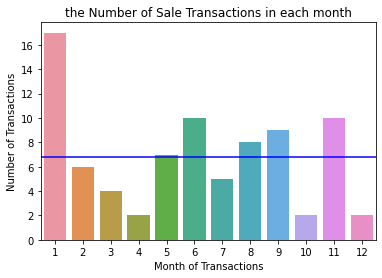

In [ ]:
# plot the Number of Sale Transactions of each month 
sns.barplot(x="transaction_month",y="InvestAmount", data=df_SaleByMonth_count)
plt.title('the Number of Sale Transactions in each month')
plt.xlabel('Month of Transactions')
plt.ylabel('Number of Transactions')
plt.axhline(y=np.mean(df_SaleByMonth_count['InvestAmount']),color="blue")
plt.show()

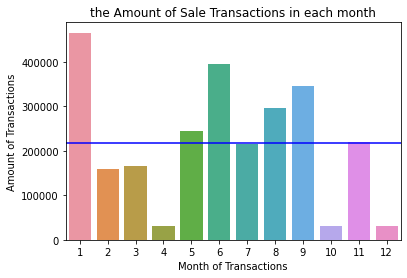

In [ ]:
# plot the Amount of Sale Transactions of each month 
sns.barplot(x="transaction_month",y="InvestAmount", data=df_SaleByMonth_sum)
plt.title('the Amount of Sale Transactions in each month')
plt.xlabel('Month of Transactions')
plt.ylabel('Amount of Transactions')
plt.axhline(y=np.mean(df_SaleByMonth_sum['InvestAmount']),color="blue")
plt.show()


In [ ]:
# group the Purchase dataframe by transaction_month and count the transaction times
df_PurchaseByMonth_count = df_Purchase.groupby(['transaction_month']).count()
df_PurchaseByMonth_count = df_PurchaseByMonth_count.reset_index()
# group the Purchase dataframe by transaction_month and sum the transaction amount
df_PurchaseByMonth_sum = df_Purchase.groupby(['transaction_month']).sum()
df_PurchaseByMonth_sum = df_PurchaseByMonth_sum.reset_index()

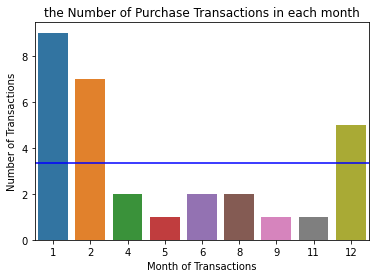

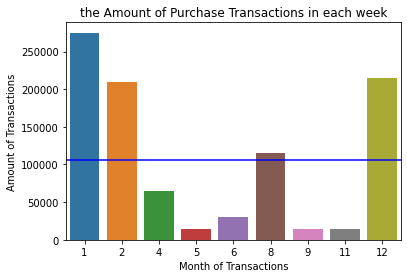

In [ ]:
# plot the Number of Purchase  Transactions of each moonth 
sns.barplot(x="transaction_month",y="InvestAmount", data=df_PurchaseByMonth_count)
plt.title('the Number of Purchase Transactions in each month')
plt.xlabel('Month of Transactions')
plt.ylabel('Number of Transactions')
plt.axhline(y=np.mean(df_PurchaseByMonth_count['InvestAmount']),color="blue")
plt.show()

# plot the Amount of Purchase  Transactions of each moonth 
sns.barplot(x="transaction_month",y="InvestAmount", data=df_PurchaseByMonth_sum)
plt.title('the Amount of Purchase Transactions in each week')
plt.xlabel('Month of Transactions')
plt.ylabel('Amount of Transactions')
plt.axhline(y=np.mean(df_PurchaseByMonth_sum['InvestAmount']),color="blue")
plt.show()

By comparing the four plots of the two types of transactions, we have the following interesting findings:
1. Senator Toomey made the highest trading volume in January. The trading volume of stocks being sold or bought is far exceeding the annual average. Therefore, we believe that the few stocks traded in January may have more profit margins.
2. In May, June, August, September, and November, senator Toomey’s trading volume of stock sold is much larger than the amount of stock purchased (we compared volumes to the average monthly selling / purchase amount). It can be inferred that the few stocks that have been heavily sold in these five months may be bearish by Senator Toomey.
3. Contrary to the previous situation, Senator Toomey seems to buy a large number of stocks every December. It can be seen from the plots that the trading volume of stocks purchased in December was much higher than the trading volume of stocks sold. Therefore, if there are duplicates in the several stocks purchased in December each year, it means that Senator Toomey may be optimistic about these stocks for a long time.
4. Senator Toomey never bought stocks in March, July, and October, and only sold a small amount of stocks in March and October. Only in July is the equivalent of the average number of shares sold. This seems a little weird
5. Mr. Member's sales/purchase transactions in February and April are roughly equivalent to the monthly average.


###External data for select tickers

Data aggrigated for tickers that appear in analysis. Data was collected in an external Google Sheets (https://docs.google.com/spreadsheets/d/1Bqcir1s_DYEjIUnWR64zZBIdrE-zNjszS5_ynTU8xuI/edit#gid=0) and converted into CSV format (https://drive.google.com/file/d/1CKlF2VTNnDSmsUE8L8r9-v8CJh-p2hv7/view?usp=sharing).

Data collected on each ticker comes from Yahoo Finance and includes:

* Ticker
* Company or fund name
* Sector
  * Energy
  * Materials
  * Industrials
  * Consumer Discretionary
  * Consumer Staples
  * Health Care
  * Financials
  * Information Technology
  * Cryptocurrency
  * ETF
* ESG composite score

ESG scores were collected where available to analyze for any preference toward "cleaner" companies or those who better manage their ESG risks. ESG composite risk scores range from 0-100 where a **lower score shows less unmanaged risk**

Resultant CSV file is loaded into Python and stored as DataFrame `ext_data`

In [ ]:
# Save data link code as variable
External_Ticker_Data = 'https://drive.google.com/file/d/1CKlF2VTNnDSmsUE8L8r9-v8CJh-p2hv7/view?usp=sharing'
# Extract the file ID from the URL (this part of the command is fixed)
file_path_External_Ticker_Data = External_Ticker_Data.split('/')[-2]
# Retrieve the CSV data and build a dataframe
ext_data = pd.read_csv(fixed_path + file_path_External_Ticker_Data)
# Rename ESG score to one word column
ext_data.rename(columns={'ESG score':'ESG'},inplace=True) #rename column to 'ESG'
ext_data.head()

,Ticker,Name,Sector,ESG,Notes,Unnamed: 5
0,PHLD,Phillips Edison Grocery Center,Consumer Staples,NaN,Defunct,NaN
1,PPL,PPL Corporation,Energy,34.0,NaN,NaN
2,GE,General Electric Company,Industrials,43.0,NaN,NaN
3,ET,Energy Transfer LP,Energy,49.0,NaN,NaN
4,NDAQ,Nasdaq Inc,Financials,12.0,NaN,NaN


###Analysis of Toomey's Preferred Stocks by Frequency of Purchase

Created dataframes to count the number of times that Toomey made a 'buy' transaction for tickers and limited the result to those with the highest number of purchases.

This demonstrates a perceived sense of value by Toomey, as he looks to invest more into those stocks.

Only five stocks are purchased more than once. We will value these highly in selecting our 10 stocks for the 2022 projection. They are:
* CVX - Chevron Corp.
* GE - General Electric
* BOX - Box, Inc.
* SPY - Spyder S&P 500 index
* PPL - PPL Corp.

In [ ]:
# Analysis of stocks with most frequent purchase
df_BuyCount = df_Purchase.groupby(["ticker"])["ticker"].count() #create a count of transactions (purchase) by ticker
df_BuySorted = pd.DataFrame(df_BuyCount.sort_values(ascending=False)) #sort by most frequently purchased
df_BuySorted.rename(columns={'ticker':'count'},inplace=True) #rename column 2 to 'count'
df_BuySorted.head(10) #display top ten purchases

,count
ticker,
CVX,3
GE,3
BOX,2
SPY160219P00180000,2
PPL,2
XLV,1
NDAQ,1
BUNT,1
DD,1


###Analysis of Toomey's Preferred Sectors for Investment

For this analysis we considered sectors to be those listed above in the explanation of the external data. The objective is to gain insight to which sectors Toomey prefers investing in and any attributes of those sectors which stand out.

We can see, based on transactional volume, that Sen. Patrick Toomey has a clear preference for trading in the financials sector. He also has a high volume of Consumer Discretionary, ETF, and Energy transactions.

For this information we can assume:
* he knows the financial sector well and trades there with confidence
* he values sectors with reliable demand (need driven or commodity) and is present in Energy and Consumer Discretionary as a result
* He likes ETFs as well as individual stocks and may use them as a stabilizing force against the comparative risk of the individual stocks he invests in.

In [ ]:
#Join the Senator's transaction history to the external data with the ticker as the shared attribute
df_sector = pd.merge(df, ext_data, left_on='ticker', right_on='Ticker') # create the merged data

df_sectorcount = df_sector.groupby(['Sector'])['Sector'].count() #create a count of tickers in each sector
df_sectorsorted = pd.DataFrame(df_sectorcount.sort_values(ascending=False)) # sort by top preferred sectors
df_sectorsorted.rename(columns={'Sector':'count'},inplace=True) #rename column 2 to 'count'
print(df_sectorsorted.head(10))


                        count
Sector                       
Financials                 33
Consumer Discretionary     20
ETF                        18
Energy                     17
Materials                   7
Information Technology      7
Industrials                 6
Health Care                 2
Cryptocurrency              2
Consumer Staples            2


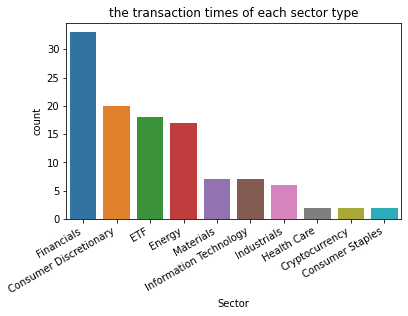

In [ ]:
# plot the transaction times of each sector type 
df_sectorsorted= df_sectorsorted.reset_index()
sns.barplot(x='Sector', y="count", data=df_sectorsorted)
plt.title('the transaction times of each sector type')
plt.gcf().autofmt_xdate()
plt.show()

##Analysis of Toomey's Social/Sustainable Orientation in Trading

This analysis seeks to find whether or not Sen. Patrick Toomey exhibits an awareness and preference for 'green' or 'clean' companies to invest in.

One of the most powerful tools for this analysis is a company's Environmental, Social, Governance (ESG) rating. Not all firms are assessed on the ESG scale, so this analysis only covers those companies with ESG ratings on the Yahoo Finance website.

The code reveals that Toomey's **average ESG rating is 32.57** across all his transactions. Given that ESG ratings work roughly like quartiles, this would place Toomey squarely in the 2nd ESG quartile. We can safely assume that Sen. Toomey is not interested in sustianability as a factor in his investment decisions.

In [ ]:
## Find Toomey's ESG average
esg_avg = mean(df_sector['ESG'])

print("Toomey's Average ESG rating: ", round(esg_avg,ndigits=2)) # print rounded average

Toomey's Average ESG rating:  32.57


# 2. Analyze and select the data

## Select 10 stocks 

Based on the analysis of Pat Toomey's stock actions we made the following selections.

Using volume of repeat stock purchases as evidence of strong performance and wanting to own more:
* **CVX**
* **GE**
* **BOX**
* **SPY**
* **PPL**

Using his industry knowledge and preference for financials and our knowledge of these two companies (scale and accessibility to data):
* **BAC**
* **TRV**

Using his affinity for ETFs and their value in touching many stocks without investing in each individually:
* **QQQ**
* **NDAQ**

To round out the top ten we added **PG**. It is well established in the Consumer Discretionary sector which Toomey favors and offers further diversity in our portfolio of picks.

This selection offers us a variety of sectors, highlights Toomey's areas of knowledge, and sticks to tickers with available data in yahoo Finance to complete our projection.

Now we import Yahoo Finance package information.

In [ ]:
# some stock-specific packages
!pip install yahoo_fin      #Yahoo Finance information to be used directly
!pip install requests_html
import yahoo_fin.stock_info as si

     |████████████████████████████████| 81 kB 4.1 MB/s 
     |████████████████████████████████| 83 kB 2.0 MB/s 
     |████████████████████████████████| 103 kB 47.6 MB/s 
     |████████████████████████████████| 127 kB 54.2 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=da74d11d527641784d271f4350ff32ae2589844fcbb4654531ae536c4cf0d450
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=81f3a76e5d9f676fb8d3f56b434e78e4e2ef3250770e400ee592d1430d2c7e44
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=fefe80312d339f33e3459e02704fa7d2c43a69e4d2f6dc5ebffdd8a2412a5dd2
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

In [ ]:
# Assign the ticker list that we want to analyze
tickers_list = ['CVX', 'GE', 'BOX', 'SPY', 'PPL', 'BAC', 'TRV', 'QQQ', 'NDAQ', 'PG']
# pull historical monthly price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2015',end_date='03/01/2020',interval='1mo') for ticker in tickers_list}

We take the aforementioned 10 stocks and analyze their DOW index prices at various dates within the period of interest, on an interval of 1 month.

In [ ]:
# take a peek!
dow_prices

{'BAC':                  open       high        low  ...   adjclose      volume  ticker
 2015-01-01  17.990000  18.030001  14.970000  ...  13.372553  2211366600     BAC
 2015-02-01  15.270000  16.790001  15.120000  ...  13.955118  1910757200     BAC
 2015-03-01  15.790000  16.620001  15.260000  ...  13.584394  1855236900     BAC
 2015-04-01  15.420000  16.049999  15.250000  ...  14.105008  1464221900     BAC
 2015-05-01  16.000000  16.850000  15.920000  ...  14.609707  1403264600     BAC
 ...               ...        ...        ...  ...        ...         ...     ...
 2019-10-01  29.440001  32.230000  27.160000  ...  29.858885  1206828400     BAC
 2019-11-01  31.700001  33.599998  31.370001  ...  31.816374   847433200     BAC
 2019-12-01  33.450001  35.720001  32.549999  ...  33.630634   941699200     BAC
 2020-01-01  35.349998  35.669998  32.470001  ...  31.519636   995093800     BAC
 2020-02-01  33.000000  35.450001  27.700001  ...  27.362461  1072992000     BAC
 
 [62 rows x 7 colum

In [ ]:
tickers_list[0:] #ensure that the ticker list has been processed correctly

['CVX', 'GE', 'BOX', 'SPY', 'PPL', 'BAC', 'TRV', 'QQQ', 'NDAQ', 'PG']

Now we focus on the adjclose information for each ticker, and compile that information into one dataframe.

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose data for one sample
prep_data = pd.DataFrame(dow_prices['CVX']['adjclose']).rename(columns = {"adjclose":"CVX"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:                                  #Iterates through remaining other tickers
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])    #Adds these iterated prices for each ticker onto the previously made sample info
prep_data

,CVX,GE,BOX,SPY,PPL,BAC,TRV,QQQ,NDAQ,PG
2015-01-01,76.011711,160.205032,NaN,175.708038,23.503862,13.372553,87.770279,95.588951,40.468781,68.532898
2015-02-01,79.088364,174.287537,18.660000,185.583679,22.576946,13.955118,91.714073,102.491013,44.515652,69.708160
2015-03-01,78.592690,167.903976,19.750000,181.857178,22.285631,13.584394,92.303078,99.843651,45.207890,67.096024
2015-04-01,83.144447,183.266373,17.110001,184.465317,22.784983,14.105008,86.754051,101.997040,43.288635,65.106262
2015-05-01,77.110374,184.552231,17.639999,186.836823,23.240276,14.609707,86.762627,104.290390,46.065945,64.705437
...,...,...,...,...,...,...,...,...,...,...
2019-10-01,104.614372,79.184563,16.920000,293.441833,29.967674,29.858885,124.699127,194.851410,96.793953,117.775391
2019-11-01,105.506142,89.419861,18.240000,304.063934,30.450878,31.816374,130.084473,202.780701,101.673920,116.195427
2019-12-01,109.620300,88.547073,16.780001,311.367798,32.106300,33.630634,130.303268,210.205795,103.905304,118.898979
2020-01-01,97.458466,98.871910,15.030000,312.772308,32.777561,31.519636,125.993187,217.062347,113.499573,118.632439


In [ ]:
prep_data.shape #Quickly see how many instances are represented

(62, 10)

To measure actual returns, we create a new dataframe based off of the adjclose data where we look at percentage of returns.

In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
df_select_10 = pd.DataFrame()                     #Create new dataframe to store this data
for i in tickers_list:                            #Iterate through all of the predefined tickers
  df_select_10[i] = prep_data[i].pct_change()     #Place percent change values in this new dataframe 
# drop the na records
df_select_10.dropna(inplace=True)
df_select_10

,CVX,GE,BOX,SPY,PPL,BAC,TRV,QQQ,NDAQ,PG
2015-03-01,-0.006267,-0.036627,0.058414,-0.020080,-0.012903,-0.026565,0.006422,-0.025830,0.015550,-0.037472
2015-04-01,0.057916,0.091495,-0.133671,0.014342,0.022407,0.038324,-0.060117,0.021568,-0.042454,-0.029655
2015-05-01,-0.072573,0.007016,0.030976,0.012856,0.019982,0.035782,0.000099,0.022484,0.064158,-0.006156
2015-06-01,-0.054065,-0.025669,0.056689,-0.025054,-0.088431,0.031515,-0.044106,-0.027079,-0.056812,-0.001913
2015-07-01,-0.082824,-0.009334,-0.123927,0.027564,0.092570,0.053680,0.104654,0.047982,0.050722,-0.019684
2015-08-01,-0.084652,-0.049042,-0.174525,-0.060950,-0.025778,-0.086130,-0.061911,-0.068245,0.003136,-0.071073
2015-09-01,-0.013781,0.016116,-0.066766,-0.030556,0.061310,-0.046511,-0.000201,-0.024447,0.041805,0.017971
2015-10-01,0.152130,0.156971,-0.007949,0.090701,0.059408,0.080489,0.141353,0.116409,0.090754,0.061718
2015-11-01,0.004842,0.035270,0.121795,0.003655,-0.010465,0.038736,0.014882,0.006088,0.012610,-0.011356
2015-12-01,-0.002861,0.040414,-0.002857,-0.023097,0.002644,-0.034423,-0.014925,-0.018944,-0.007677,0.061064


In [ ]:
# check the shape of the data
df_select_10.shape

(60, 10)

For visual aid, we will represent this percent change over time in plots below for each respective ticker.

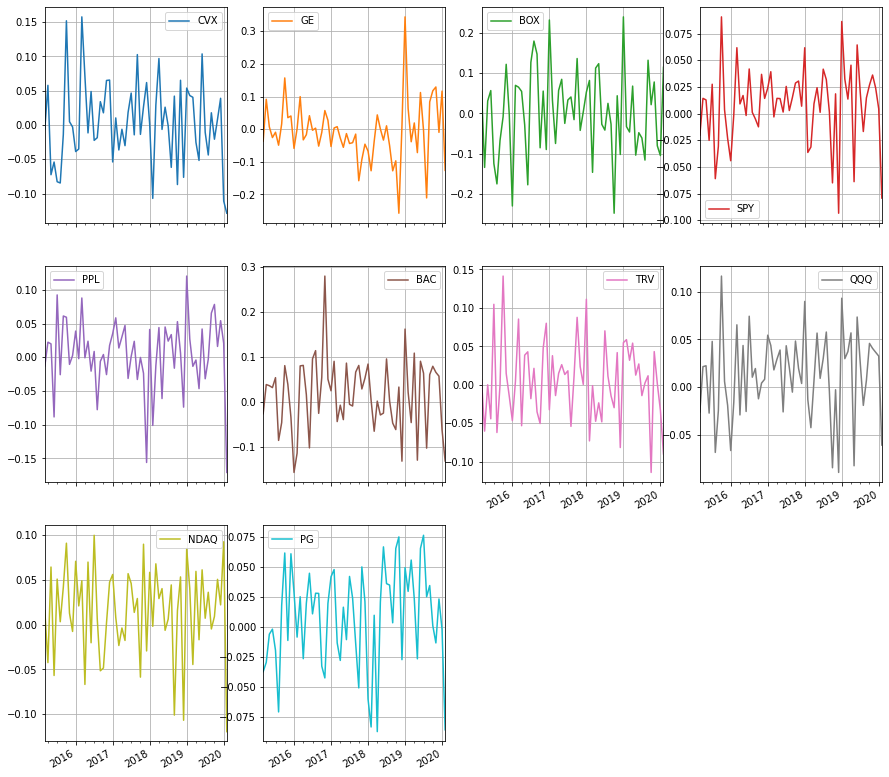

In [ ]:
# See each ticker's percent change in the plot

df_select_10.plot(subplots=True,    #Ensures that there will be subplots for each column
        grid=True,                  #Enables background grid for visual assistance
        layout=(3,4),               #Defines layout of subplots
         figsize=(15,15))           #Defines size of plots
plt.show()                          #Displays plot

Now that this data is properly represented, we can move onto modeling!

# 3. Create the models

Now we can begin modeling!

As discussed in class, when we use Pyomo, we are going to bring in `ipopt` as a solver.

In [ ]:
# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # Using the IPOPT solver
except:
    pass

     |████████████████████████████████| 9.1 MB 4.7 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 


Now we can generate a plot overlapping the return values from the previous subplots. As you can see, it looks pretty messy and volatile!

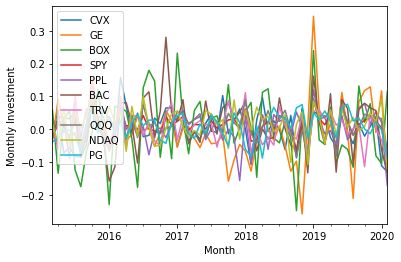

In [ ]:
# see what it looks like... messy... some volatility here!
df_select_10.plot()                   #Creates a plot of all the montly information from the 10 selected plots
plt.xlabel('Month')                   #Sets the x label
plt.ylabel('Monthly Investment')      #Sets the y label
plt.show()                            #Displays the plot properly

Now we create a dataframe for the average return percentage per ticker, and also one for the standard deviation per ticker.

This is for the purpose of not only seeing which have the highest average returns, but also capturing risk.

In [ ]:
# See the mean and standard deviation of each stock we chose 
Avg_Return = pd.DataFrame(np.mean(df_select_10) ,columns=["Avg_Return"])          #Generates dataframe of average returns
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(df_select_10) ,columns=["Std_Dev_Return"])   #Generates dataframe of return standard deviations
print(Std_Dev_Return)

      Avg_Return
CVX     0.002983
GE     -0.007651
BOX     0.003751
SPY     0.008007
PPL     0.004572
BAC     0.014427
TRV     0.005025
QQQ     0.012500
NDAQ    0.014825
PG      0.008222
      Std_Dev_Return
CVX         0.060181
GE          0.089446
BOX         0.104426
SPY         0.036099
PPL         0.053375
BAC         0.079802
TRV         0.051064
QQQ         0.044053
NDAQ        0.049860
PG          0.040640


## Covariance Analysis
We'll now take a look at the covariances of our chosen stocks. We also have generated a correlation matrix for further information, however the contents of this correlation matrix will not be used further.

In [ ]:
# here's the covariance matrix
Covariance_matrix = df_select_10.cov()
Covariance_matrix

,CVX,GE,BOX,SPY,PPL,BAC,TRV,QQQ,NDAQ,PG
CVX,0.003683,0.001819,0.000657,0.001283,0.000869,0.002201,0.001320,0.001004,0.000448,0.000734
GE,0.001819,0.008136,0.001395,0.001517,0.002081,0.002882,0.000808,0.001667,0.001323,0.000493
BOX,0.000657,0.001395,0.011090,0.001542,-0.000277,0.003715,0.000449,0.002187,-0.000009,-0.000447
SPY,0.001283,0.001517,0.001542,0.001325,0.001015,0.002143,0.001203,0.001495,0.000928,0.000509
PPL,0.000869,0.002081,-0.000277,0.001015,0.002897,0.001039,0.000959,0.001135,0.001309,0.000724
BAC,0.002201,0.002882,0.003715,0.002143,0.001039,0.006476,0.001769,0.002143,0.001068,0.000251
TRV,0.001320,0.000808,0.000449,0.001203,0.000959,0.001769,0.002652,0.001214,0.001095,0.000556
QQQ,0.001004,0.001667,0.002187,0.001495,0.001135,0.002143,0.001214,0.001974,0.001035,0.000518
NDAQ,0.000448,0.001323,-0.000009,0.000928,0.001309,0.001068,0.001095,0.001035,0.002528,0.000688
PG,0.000734,0.000493,-0.000447,0.000509,0.000724,0.000251,0.000556,0.000518,0.000688,0.001680


And here is the correlation matrix.

In [ ]:
# here's the correlation matrix to see if there is any strong correlation
Corr_matrix = df_select_10.corr()
Corr_matrix

,CVX,GE,BOX,SPY,PPL,BAC,TRV,QQQ,NDAQ,PG
CVX,1.000000,0.332358,0.102835,0.580865,0.265982,0.450585,0.422371,0.372285,0.146944,0.295232
GE,0.332358,1.000000,0.146901,0.461933,0.428545,0.397074,0.174042,0.415949,0.291627,0.133385
BOX,0.102835,0.146901,1.000000,0.402339,-0.048878,0.438314,0.082733,0.467584,-0.001775,-0.103667
SPY,0.580865,0.461933,0.402339,1.000000,0.517781,0.731579,0.641500,0.924415,0.507165,0.341119
PPL,0.265982,0.428545,-0.048878,0.517781,1.000000,0.239852,0.345938,0.474863,0.483561,0.328333
BAC,0.450585,0.397074,0.438314,0.731579,0.239852,1.000000,0.426876,0.599420,0.264052,0.076081
TRV,0.422371,0.174042,0.082733,0.641500,0.345938,0.426876,1.000000,0.530865,0.422797,0.263225
QQQ,0.372285,0.415949,0.467584,0.924415,0.474863,0.599420,0.530865,1.000000,0.463330,0.284498
NDAQ,0.146944,0.291627,-0.001775,0.507165,0.483561,0.264052,0.422797,0.463330,1.000000,0.333816
PG,0.295232,0.133385,-0.103667,0.341119,0.328333,0.076081,0.263225,0.284498,0.333816,1.000000


## Build the Nonlinear Optimization Model
Now we must create a nonlinear optimization model to solve this problem, given its nature.

To start, we once again print the covariance matrix, and print the list of average returns. These will be the objective function's coefficients.

In [ ]:
# creating covariance table on stock return dataframe
df_select_10_cov = df_select_10.cov()                 #While it may seem redundant, for the purpose of readability we print this information once again.
print('Covariance Matrix:')                           #Define what we are representing
print(df_select_10_cov)                               #Print the covariance matrix
print('\n')                                           #Print blank line for formatting

# create the average of each stock
# these are the objective function COEFFICIENTS!
df_select_10_return = df_select_10.mean()             #Find average return values
print('Average Return:')                              #Define what we are representing
print(df_select_10_return)                            #Print the list of return averages

Covariance Matrix:
           CVX        GE       BOX  ...       QQQ      NDAQ        PG
CVX   0.003683  0.001819  0.000657  ...  0.001004  0.000448  0.000734
GE    0.001819  0.008136  0.001395  ...  0.001667  0.001323  0.000493
BOX   0.000657  0.001395  0.011090  ...  0.002187 -0.000009 -0.000447
SPY   0.001283  0.001517  0.001542  ...  0.001495  0.000928  0.000509
PPL   0.000869  0.002081 -0.000277  ...  0.001135  0.001309  0.000724
BAC   0.002201  0.002882  0.003715  ...  0.002143  0.001068  0.000251
TRV   0.001320  0.000808  0.000449  ...  0.001214  0.001095  0.000556
QQQ   0.001004  0.001667  0.002187  ...  0.001974  0.001035  0.000518
NDAQ  0.000448  0.001323 -0.000009  ...  0.001035  0.002528  0.000688
PG    0.000734  0.000493 -0.000447  ...  0.000518  0.000688  0.001680

[10 rows x 10 columns]


Average Return:
CVX     0.002983
GE     -0.007651
BOX     0.003751
SPY     0.008007
PPL     0.004572
BAC     0.014427
TRV     0.005025
QQQ     0.012500
NDAQ    0.014825
PG      0.008222

We now define all of our decision variables for each of our 10 chosen stocks.

In [ ]:
from pyomo.environ import *
m = ConcreteModel()

# defining variables
# each one is a stock (10 stocks we chose)
m.Stock1 = Var(within=NonNegativeReals, bounds=(0,1))
m.Stock2 = Var(within=NonNegativeReals, bounds=(0,1))
m.Stock3 = Var(within=NonNegativeReals, bounds=(0,1))
m.Stock4 = Var(within=NonNegativeReals, bounds=(0,1))
m.Stock5 = Var(within=NonNegativeReals, bounds=(0,1))
m.Stock6 = Var(within=NonNegativeReals, bounds=(0,1))
m.Stock7 = Var(within=NonNegativeReals, bounds=(0,1))
m.Stock8 = Var(within=NonNegativeReals, bounds=(0,1))
m.Stock9 = Var(within=NonNegativeReals, bounds=(0,1))
m.Stock10 = Var(within=NonNegativeReals, bounds=(0,1))

We now define our objective function:

$Max(Z) = \sum_{i=0}^{10}Stock(i)*Return(i)$

We want to maximize our returns from our investments.

Constraints:

- $\sum_{i=0}^{10}Stock(i) == 1$ `Sum Proportions Constraint`

- $Max(Z) >= 0.0001$ `Return Floor Constraint`

- $\sum_{i=0}^{10}Stock(i) >=0$ `Total Risk Constraint`

The risk constraint is defined here for technical reasons, for use further down in the problem.

In [ ]:
# declare objective
m.objective = Objective(expr =               
                        m.Stock1*df_select_10_return[0] +           #Add each stock return average times the respective stock
                        m.Stock2*df_select_10_return[1] + 
                        m.Stock3*df_select_10_return[2] +
                        m.Stock4*df_select_10_return[3] + 
                        m.Stock5*df_select_10_return[4] + 
                        m.Stock6*df_select_10_return[5] + 
                        m.Stock7*df_select_10_return[6] +
                        m.Stock8*df_select_10_return[7] + 
                        m.Stock9*df_select_10_return[8] + 
                        m.Stock10*df_select_10_return[9],
                        sense=maximize)                             #We want to maximize returns

# declare constraints
# 1. Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.Stock1 + m.Stock2 + m.Stock3 + m.Stock4 + m.Stock5 + m.Stock6 + m.Stock7+ m.Stock8 + m.Stock9 + m.Stock10 == 1)

# 2. Minimum return should be 0.0001
m.return_floor = Constraint(expr = m.objective >= 0.0001)

# 3. Set maximum risk: WE ARE INCLUDING THIS CONSTRAINT NOW FOR TECHNICAL REASONS (see below), YOU CAN (and should!) IGNORE IT FOR NOW!
m.total_risk = Constraint(expr = m.Stock1 + m.Stock2 + m.Stock3 + m.Stock4 + m.Stock5 + m.Stock6 + m.Stock7 + m.Stock8 + m.Stock9 + m.Stock10 >= 0.0)

We now loop through and calculate risk, defined as:

$Prop(A) * Prop(B) * Cov(A,B)$

We have the maximum risk set at 0.003.

In [ ]:
# creating calculations table for calculate the risk
# 3. Max risk should be less than 0.003
max_risk = 0.003
def calc_risk():
  # this is a list of all of your investment allocations (proportion invested in each stock)
  # this is UPDATED as the model is cranking - see how we are referncing the decision variables?
  proportions = [ m.Stock1, m.Stock2, m.Stock3, m.Stock4, m.Stock5, m.Stock6, m.Stock7, m.Stock8, m.Stock9, m.Stock10]
  risk_matrix = [] # an empty list
  
  # now we iterate across the covariance matrix
  # We just need the index, but df_cov.columns gives a list of pairs, so we need to get col as well
  for index, col in enumerate(df_select_10_cov.columns):      #Iterate through columns in the covariance matrix
    i = 0                                                     #Store a value i by which to iterate through
    risk = []                                                 #Store an empty list for later use 
    for row in df_select_10_cov[col]:                         #Iteration within for loop; for each row in covariance matrix in respective column
      risk.append(proportions[index]*row*proportions[i])      #Append risk calculation to previously defined risk list
      i = i + 1                                               #Iterate to next instance
    risk_matrix.append(risk)                                  #Append risk values to greater matrix
  risk_matrix = pd.DataFrame(risk_matrix)                     #Convert this matrix to a dataframe
  return risk_matrix.sum().sum()                              #Return the summed matrix

# We are going to use this expression to compute the risk
expr_risk = calc_risk()

# Sequence of risk levels
risk_limits = np.arange(0, 0.003, 0.0001) # take tiny steps
risk_limits

array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
       0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029])

## Run the model
Now it's time to run the actual model!

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  # WE REMOVE AND RECALCULATE THE RISK IN EACH ITERATION
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis[r] = [m.Stock1(), m.Stock2(), m.Stock3(), m.Stock4(), m.Stock5(), m.Stock6(), m.Stock7(), m.Stock8(), m.Stock9(), m.Stock10()]
  # store our returns
  returns[r] =  m.Stock1()*df_select_10_return[0] + m.Stock2()*df_select_10_return[1] + m.Stock3()*df_select_10_return[2] + m.Stock4()*df_select_10_return[3] + m.Stock5()*df_select_10_return[4]+ m.Stock6()*df_select_10_return[5] + m.Stock7()*df_select_10_return[6] + m.Stock8()*df_select_10_return[7] + m.Stock9()*df_select_10_return[8]+ m.Stock10()*df_select_10_return[9]

    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time

## Infeasible solutions

We want to filter out any infeasible solutions.

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)

  # If solution is not feasible, ignore this run (check the solution is optimal or not)
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result = result.write()

  # store our allocation proportions
  param_analysis[r] = [m.Stock1(), m.Stock2(), m.Stock3(), m.Stock4(), m.Stock5(), m.Stock6(), m.Stock7(), m.Stock8(), m.Stock9(), m.Stock10()]
  # store our returns
  returns[r] =  m.Stock1()*df_select_10_return[0] + m.Stock2()*df_select_10_return[1] + m.Stock3()*df_select_10_return[2] + m.Stock4()*df_select_10_return[3] + m.Stock5()*df_select_10_return[4]+ m.Stock6()*df_select_10_return[5] + m.Stock7()*df_select_10_return[6] + m.Stock8()*df_select_10_return[7] + m.Stock9()*df_select_10_return[8]+ m.Stock10()*df_select_10_return[9]


    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination

#4. Model Analysis


## Parameter Analysis
Let's see what the efficient frontier looks like, and the allocation!

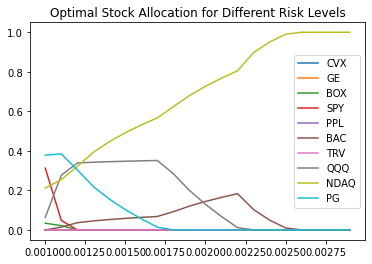

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')                   
param_analysis.columns = ['CVX', 'GE', 'BOX', 'SPY', 'PPL', 'BAC', 'TRV', 'QQQ', 'NDAQ', 'PG']   #Define columns to be analyzed (our used tickers)
param_analysis.plot()                                                                            #Plot the chart
plt.title('Optimal Stock Allocation for Different Risk Levels')                                  #Give it a fitting title
plt.show()                                                                                       #Display the chart

Here's our Stock Allocation chart!

On the leftmost side, we have a portfolio with lower risk and higher diversity. As you move further to the right, that diversity decreases and risk increases. However, our potential returns increase with the increasing risk.

As you can see, of our selected stocks, the most potentially profitable if we did not account for risk would be NDAQ past a certain point.

##The Efficient Frontier

Now, let us examine the efficient frontier properly!

In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.001, 0.0011, 0.0012000000000000001, 0.0013000000000000002, 0.0014, 0.0015, 0.0016, 0.0017000000000000001, 0.0018000000000000002, 0.0019, 0.002, 0.0021000000000000003, 0.0022, 0.0023, 0.0024000000000000002, 0.0025, 0.0026000000000000003, 0.0027, 0.0028, 0.0029000000000000002]
[0.009675729208969778, 0.011070307470402734, 0.012017423662594118, 0.012561433926398458, 0.012972193317225777, 0.013316321451256495, 0.013618485009782142, 0.01389109550709128, 0.014128197493217028, 0.01431214637832445, 0.014466462838634356, 0.014602058191255894, 0.014724442209044548, 0.014783704429852907, 0.014804984690701479, 0.01482083090725597, 0.014824772033420214, 0.014824756372861604, 0.014824756873961635, 0.014824756107826341]


In [ ]:
returns

{0.001: 0.009675729208969778,
 0.0011: 0.011070307470402734,
 0.0012000000000000001: 0.012017423662594118,
 0.0013000000000000002: 0.012561433926398458,
 0.0014: 0.012972193317225777,
 0.0015: 0.013316321451256495,
 0.0016: 0.013618485009782142,
 0.0017000000000000001: 0.01389109550709128,
 0.0018000000000000002: 0.014128197493217028,
 0.0019: 0.01431214637832445,
 0.002: 0.014466462838634356,
 0.0021000000000000003: 0.014602058191255894,
 0.0022: 0.014724442209044548,
 0.0023: 0.014783704429852907,
 0.0024000000000000002: 0.014804984690701479,
 0.0025: 0.01482083090725597,
 0.0026000000000000003: 0.014824772033420214,
 0.0027: 0.014824756372861604,
 0.0028: 0.014824756873961635,
 0.0029000000000000002: 0.014824756107826341}

We'll also add some code where you can input risk levels to receive an output of what the corresponding reward would be. First we have the requisite if statements below to make this possible, to compare a specific input against the list.

In [ ]:
def my_reward(risk_level):                  #Define function to ascertain risk reward at set intervals
  if risk_level == 0.0012:                  #These first if and elif statements alter input to actual longer values in list above
    risk_level = 0.0012000000000000001      #As seen here, 0.0012 alters to 0.0012000000000000001, due to the way it iterated in the code
  elif risk_level == 0.0013:                #This is applied to these specific iterations
    risk_level = 0.0013000000000000002
  elif risk_level == 0.0017:
    risk_level = 0.0017000000000000001
  elif risk_level == 0.0018:
    risk_level = 0.0018000000000000002
  elif risk_level == 0.0021:
    risk_level = 0.0021000000000000003
  elif risk_level == 0.0024:
    risk_level = 0.0024000000000000002
  elif risk_level == 0.0026:
    risk_level = 0.0026000000000000003
  elif risk_level == 0.0029:
    risk_level = 0.0029000000000000002
  
  if risk_level in list(returns.keys()):  #Checks if the input risk level is in the list of checked values
    print('Under the %s risk level, your reward will be %s ' % (round(risk_level,4), returns[risk_level]))   #returns the risk to the corresponding risk level
  else:
    print('Wrong input, please input a risk level between 0.001 and 0.003(step = 0.0001)')          #Returns this if unacceptable risk value is used


Next, we have the area where this can be input.

In [ ]:
my_reward(0.0018) #Implementation of the reward function

Under the 0.0018 risk level, your reward will be 0.014128197493217028 


Now, let's plot the efficient frontier!

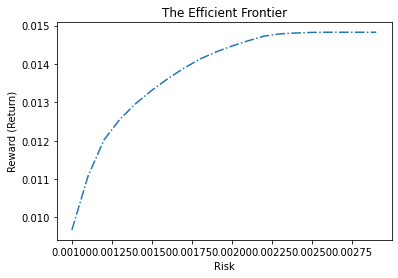

In [ ]:
#Time to plot the efficient frontier
from pylab import *
plot(risk, reward, '-.')          #Frontier display format; use risk and reward items defined before
title('The Efficient Frontier')   #Give it a title!
xlabel('Risk')                    #Define x label
ylabel('Reward (Return)')         #Define y label
plt.show()                        #Display plot

The law of diminishing returns is certainly applicable here. We can see here that past a certain point, where risk is about equal to .00225, we see that returns stop increasing; thay stagnate at nearly 1.5%.

In the plot above, you can see how at this point you would mainly be investing in NDAQ and BAC. In fact, this rate of return is incredibly similar to their average rates of return. NDAQ in particular has a rate of return of about 1.48% on average, and BAC's is a bit lower at 1.44%.

All of these values are technically optimal, and depend merely on our set risk tolerance.

#5. Efficient Frontier Analysis and Performance

Looking at our models and such, we have chosen to have a risk level of 0.0018 for our model analysis. At this point, there is some diversity present in our portfolio, namely by us investing in about 3 different stocks: NDAQ, QQQ, and BAC. 

We have found that this point is a good middle-ground between risk and reward, as having a higher risk tolerance past this point would see more rapidly diminishing returns for increased risk, and any less than this feels too safe for us. Therefore, this area, at least for our sentiments, seems to be a sweet spot.

The return reward here, according to our calculations, should be about 0.01413, or 1.413%.

Now let's see how our stocks performed between January and October of this year!

In [ ]:
#We take the code from earlier, but adjust the date range
#This way, we can produce a table of our ticker performances in the specified range
dow_prices2 = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='10/31/2021',interval='1mo') for ticker in tickers_list}  #Date must be through Oct. 31 to capture October stock data

#Now we display this information
dow_prices2

{'BAC':                  open       high        low  ...   adjclose      volume  ticker
 2021-01-01  30.459999  34.369999  29.590000  ...  29.229996  1085862900     BAC
 2021-02-01  29.870001  37.029999  29.570000  ...  34.218319   949913300     BAC
 2021-03-01  35.520000  39.970001  35.240002  ...  38.141941  1378848200     BAC
 2021-04-01  38.830002  41.130001  37.410000  ...  40.154335  1029977500     BAC
 2021-05-01  40.869999  43.259998  39.779999  ...  41.997093   823509600     BAC
 2021-06-01  42.950001  43.490002  38.490002  ...  40.847843   984580900     BAC
 2021-07-01  41.560001  41.700001  36.509998  ...  38.164429  1060498500     BAC
 2021-08-01  38.400002  42.840000  37.549999  ...  41.537144   997205700     BAC
 2021-09-01  41.750000  44.040001  38.360001  ...  42.233578  1022281000     BAC
 2021-10-01  42.480000  48.430000  42.330002  ...  47.779999   917192100     BAC
 
 [10 rows x 7 columns],
 'BOX':                  open       high        low  ...   adjclose     volu

This is a bit hard to digest, so lets narrow it down to the information we care about! And let's narrow it to the stocks we have at that risk level! (Those being BAC, QQQ, NDAQ)

In [ ]:
# Again, we just need adjclose data
# We'll effectively do what we did before after selecting our 10 stocks

# We need to establish a list of the stocks we have at this risk level
risk_tickers = ['BAC','QQQ','NDAQ']

# get the adjclose price for CVX (one sample)
earning_data = pd.DataFrame(dow_prices2['BAC']['adjclose']).rename(columns = {"adjclose":"BAC"})

# combine all the tickers (all the rest of the samples)
for i in risk_tickers[1:]:                                      #Iterates through remaining other tickers
  earning_data[i] = pd.DataFrame(dow_prices2[i]['adjclose'])    #Adds these iterated prices for each ticker onto the previously made sample info
earning_data

,BAC,QQQ,NDAQ
2021-01-01,29.229996,313.451660,134.015305
2021-02-01,34.218319,313.033173,137.007278
2021-03-01,38.141941,318.005585,146.092239
2021-04-01,40.154335,337.224518,160.585983
2021-05-01,41.997093,333.173706,166.471039
2021-06-01,40.847843,353.627258,174.761780
2021-07-01,38.164429,364.166260,186.221832
2021-08-01,41.537144,379.529236,195.247208
2021-09-01,42.233578,357.563568,192.494720
2021-10-01,47.779999,386.109985,209.869995


As you can see, by the end of the period in question, our stocks were worth more than when we initially invested, meaning we actually profited from this experiment!

In [ ]:
#Now let's calculate actual earnings in this time span
earnings_BAC = earning_data['BAC'][-1] - earning_data['BAC'][0]     #BAC Earnings
earnings_QQQ = earning_data['QQQ'][-1] - earning_data['QQQ'][0]     #QQQ Earnings
earnings_NDAQ = earning_data['NDAQ'][-1] - earning_data['NDAQ'][0]  #NDAQ Earnings

print("BAC earnings this period are",earnings_BAC.round(2))         #Display overall BAC earnings
print("QQQ earnings this period are",earnings_QQQ.round(2))         #Display overall QQQ earnings
print("NDAQ earnings this period are",earnings_NDAQ.round(2))       #Display overall NDAQ earnings
print()                                                             #Print a blank line for formatting

#And now let's find the percentages by which we profited
pct_BAC = earnings_BAC/earning_data['BAC'][0]                       #Percent increase for BAC
pct_QQQ = earnings_QQQ/earning_data['QQQ'][0]                       #Percent increase for QQQ
pct_NDAQ = earnings_NDAQ/earning_data['NDAQ'][0]                    #Percent increase for NDAQ

print("Percentage change for BAC is",(pct_BAC*100).round(2),"%")    #Display BAC percent change
print("Percentage change for QQQ is",(pct_QQQ*100).round(2),"%")    #Display QQQ percent change
print("Percentage change for NDAQ is",(pct_NDAQ*100).round(2),"%")  #Display NDAQ percent change

print("Average percentage change overall is",(((pct_BAC+pct_QQQ+pct_NDAQ)/3)*100).round(2),"%")   #Display the average percentage change across our stocks at this risk level


BAC earnings this period are 18.55
QQQ earnings this period are 72.66
NDAQ earnings this period are 75.85

Percentage change for BAC is 63.46 %
Percentage change for QQQ is 23.18 %
Percentage change for NDAQ is 56.6 %
Average percentage change overall is 47.75 %


#6. Conclusions

- **Overall, our investments proved to be successful** based on the information provided by Senator Toomey.
- Using Toomey's decisions as our framework, following indices (QQQ, NDAQ) is effective, meaning that **Toomey is generally not better at picking stocks than an index fund.**
  * The strong performance of Bank of America (BAC) is one counterpoint to this, which is why we hedge to say "generally" not better.
- **Toomey's lack of alignment to sustainable stocks is costing him (and us as a result) money.** In the March 2020 to October 2021 timeframe, the Fidelity US Sustainability Index (FITLX) had grown by 90% -- nearly double what our Toomey-based portfolio achieved.
- **The periods in question may exaggerate performance.** Wall Street experienced several points of turmoil in the past few years, most recently in the early days of the pandemic. Our stocks picks are all abalyzed during a record-setting rally that has continued through most of 2021.
- **The model still have disadvantages on making a more efficient portfollio.** Our model here is just simply calculate the historical performance of each stock and see if there is a way we can make more money in a given risk range. But some of the volatility of stock price caused by the accident events happened on these companies and investors' different expectations on each company. Some bad news, even scandals would cause a plummet in one company’s stock price. And all these accidents cannot be predicted by this model.